In [5]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("train.csv")

# EDA & Data Preparation

In [7]:
df.shape

(891, 12)

## 1. display the data
 - as we can see below that **[PassengerId, Name, Ticket]**, are not important feature for our problem, so we may like to **drop them**.
 - survived column is our target is column number 2, we may like to **change its location to the last column**.

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Drop columns**

In [9]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace = True)

**Change location of Survived to be the last column**

In [10]:
columns = df.columns.tolist()
columns.append(columns.pop(0))
df = df[columns]
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


## 2. Check for Datatype using info() and check for null values
- as we can see below that three columns have null values, where:
    1. **Age** has about **20% null values**. So we might want **replace null values with the median** since Age dist is right skewed.
    2. **Cabin** has about **77% null values**. So we might want to **drop this column**.
    3. **Embarked** has only **two non values**, So we can just **drop the rows** of these two values.
- we can also see that:
    - columns like **[Survived, Pclass, SibSp, Parch]**, are discrete numeric, so we may want to **represent them as categorical columns**
    - columns like **[Sex, Embarked]**, are object type, so we may want to **represent them as categorical columns**


In [8]:
# the ratio of null values
null_sum = df.isnull().sum()
null_ratio = df.isnull().sum() / df.shape[0]
pd.DataFrame([null_sum, null_ratio], index=["Null_sum", "Null_ratio"])

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Null_sum,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000,0.0
Null_ratio,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245,0.0


In [9]:
# check for number of unique values, dtype
pd.DataFrame([df.nunique(), df.dtypes], index=["num_unique", "dtype"])

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
num_unique,3,2,88,7,7,248,147,3,2
dtype,int64,object,float64,int64,int64,float64,object,object,int64


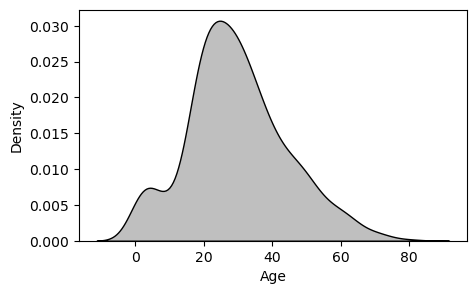

In [10]:
# Age column distribution
plt.figure(figsize=(5, 3))
sns.kdeplot(df['Age'], color="black", fill=True)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


**Handle Null Values**

In [12]:
# replace Age missing values with the median
median = df["Age"].median() # don't use np.median(df["Age"]) --> if you do the value of the median will be Null
df["Age"].fillna(median, inplace=True)

In [13]:
# drop Cabin column
df = df.drop("Cabin", axis=1)

In [14]:
# drop rows with null value in Embarked row
df = df.dropna(subset=['Embarked'])

**Represent some columns as categorical**

In [15]:
cols = ["Pclass", "SibSp", "Parch", "Sex", "Embarked", "Survived"]
df[cols] = df[cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    889 non-null    category
 1   Sex       889 non-null    category
 2   Age       889 non-null    float64 
 3   SibSp     889 non-null    category
 4   Parch     889 non-null    category
 5   Fare      889 non-null    float64 
 6   Embarked  889 non-null    category
 7   Survived  889 non-null    category
dtypes: category(6), float64(2)
memory usage: 27.2 KB


## 3. Check for Duplicates
- as we can see our data has 116 duplicated rows, so we may want to **remove the duplication**

In [16]:
df.duplicated().sum()

116

**Drop Duplicated rows**

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       773 non-null    category
 1   Sex          773 non-null    category
 2   Age          773 non-null    float64 
 3   family_size  773 non-null    category
 4   SibSp        773 non-null    category
 5   Parch        773 non-null    category
 6   Fare         773 non-null    float64 
 7   Embarked     773 non-null    category
 8   Survived     773 non-null    category
dtypes: category(7), float64(2)
memory usage: 25.0 KB


## 4. Statistics about Data

In [19]:
# stats about numeric data
df.describe()

,Age,Fare
count,773.000000,773.000000
mean,29.528357,34.761659
std,13.731264,52.425906
min,0.420000,0.000000
25%,21.000000,8.050000
50%,28.000000,15.900000
75%,36.000000,33.500000
max,80.000000,512.329200


In [20]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,28.0,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [21]:
# stats about categorical data
df.describe(include=["category", "object"])

,Pclass,Sex,SibSp,Parch,Embarked,Survived
count,773,773,773,773,773,773
unique,3,2,7,7,3,2
top,3,male,0,0,S,0
freq,401,483,506,569,560,455


In [22]:
df.iloc

## 4. Check for Outliers

In [23]:
# using normal distribution
from scipy.stats import zscore
numeric_df = df.select_dtypes(include="number")
z_scores = zscore(numeric_df)
outliers_index = (abs(z_scores) > 3).any(axis=1)
outliers_df = df[outliers_index]
print(f"There are {outliers_df.shape[0]}Rows that contain outliers")
outliers_df

There are 24Rows that contain outliers


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
27,1,male,19.0,3,2,263.0000,S,0
88,1,female,23.0,3,2,263.0000,S,1
96,1,male,71.0,0,0,34.6542,C,0
118,1,male,24.0,0,1,247.5208,C,0
258,1,female,35.0,0,0,512.3292,C,1
299,1,female,50.0,0,1,247.5208,C,1
311,1,female,18.0,2,2,262.3750,C,1
341,1,female,24.0,3,2,263.0000,S,1
377,1,male,27.0,0,2,211.5000,C,0
380,1,female,42.0,0,0,227.5250,C,1


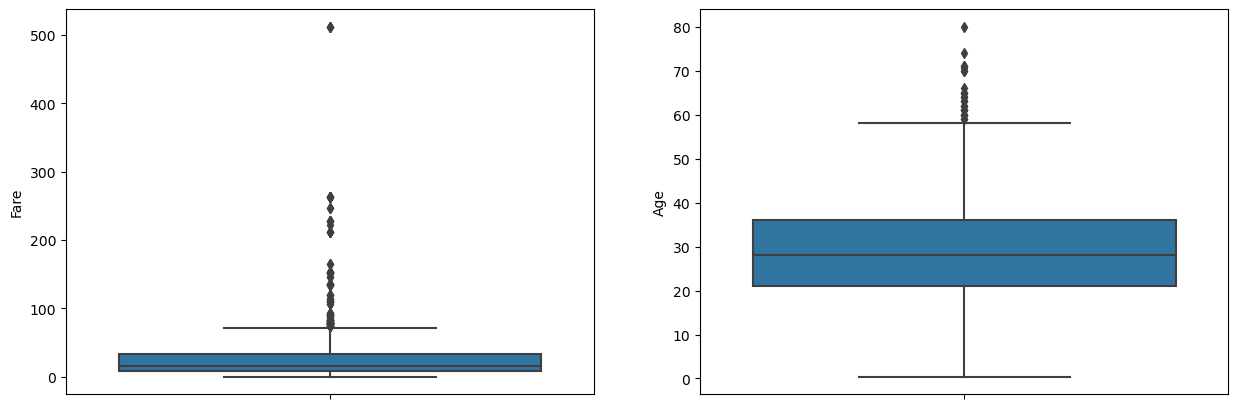

In [24]:
# using BoxPlot 
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y="Fare", data=df)
plt.subplot(1, 2, 2)
sns.boxplot(y="Age", data=df)
plt.show()

In [25]:
numeric_df = df.select_dtypes(include="number")
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df.iloc[0:0,:]
for col in lower_bound.index:
    print(f"{col}-column has: lower-fence of {lower_bound[col]}, & upper-fence of {upper_bound[col]}")
    tmp = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]
    outliers = pd.concat([outliers, tmp], ignore_index=False) # ignore_index=True will reset the indeces.
print(f"There are {outliers.shape[0]}Rows that contain outliers")
outliers

Age-column has: lower-fence of -1.5, & upper-fence of 58.5
Fare-column has: lower-fence of -30.124999999999996, & upper-fence of 71.675
There are 126Rows that contain outliers


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
33,2,male,66.0,0,0,10.5000,S,0
54,1,male,65.0,0,1,61.9792,C,0
94,3,male,59.0,0,0,7.2500,S,0
96,1,male,71.0,0,0,34.6542,C,0
116,3,male,70.5,0,0,7.7500,Q,0
...,...,...,...,...,...,...,...,...
820,1,female,52.0,1,1,93.5000,S,1
835,1,female,39.0,1,1,83.1583,C,1
849,1,female,28.0,1,0,89.1042,C,1
856,1,female,45.0,1,1,164.8667,S,1


In [26]:
# # numerical 
# plt.figure(figsize=(15, 25))
# plt.subplot(6, 2, 1)
# sns.boxplot(x="Survived", y="Fare", data=df)
# plt.subplot(6, 2, 2)
# sns.boxplot(x="Survived", y="Age", data=df)
# # categorical 
# cat_df = df.select_dtypes(include="category")
# for i, col in enumerate(cat_df.columns[:-1]):
#     plt.subplot(6, 2, (i+1)*2+1)
#     sns.boxplot(x=col, y="Fare", hue="Survived", data=df)
#     plt.subplot(6, 2, (i+1)*2+2)
#     sns.boxplot(x=col, y="Age", hue="Survived", data=df)

## 5. Explore Categorical and Numerical Data
- categorical Visualizations
- distribution and heatmaps of correlation for numerical data

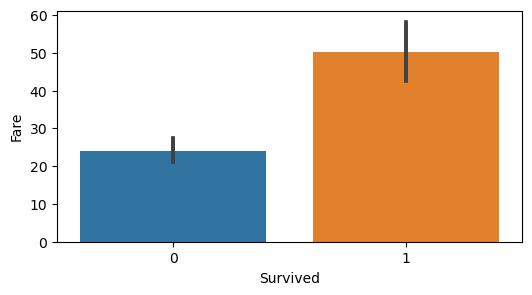

In [27]:
# check if people who survived paid more Fare
plt.figure(figsize=(6, 3))
sns.barplot(x='Survived', y='Fare', data=df)
plt.show()

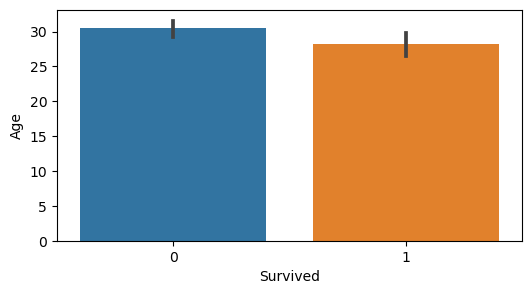

In [28]:
# check if Age had effect on survival
plt.figure(figsize=(6, 3))
sns.barplot(x='Survived', y='Age', data=df)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

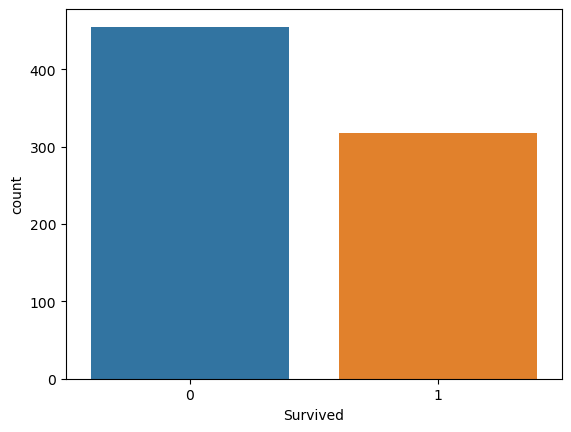

In [29]:
# Categorical Features distribution
sns.countplot(x="Survived", data=df)

## 6. Feature Engineering 
- create new column called family size by adding two columns of sibsp and parch

In [30]:
df["family_size"] = df["SibSp"].astype('int') + df["Parch"].astype('int')
df["family_size"] = df["family_size"].astype('category')

In [31]:
cols = df.columns.tolist()
cols.insert(cols.index("SibSp"), cols.pop(-1))
df = df[cols]
df

,Pclass,Sex,Age,family_size,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,1,0,7.2500,S,0
1,1,female,38.0,1,1,0,71.2833,C,1
2,3,female,26.0,0,0,0,7.9250,S,1
3,1,female,35.0,1,1,0,53.1000,S,1
4,3,male,35.0,0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
885,3,female,39.0,5,0,5,29.1250,Q,0
887,1,female,19.0,0,0,0,30.0000,S,1
888,3,female,28.0,3,1,2,23.4500,S,0
889,1,male,26.0,0,0,0,30.0000,C,1


# 8. Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['Sex', 'Embarked']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    df[column] = df[column].astype('category')
df

,Pclass,Sex,Age,family_size,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,1,0,7.2500,2,0
1,1,0,38.0,1,1,0,71.2833,0,1
2,3,0,26.0,0,0,0,7.9250,2,1
3,1,0,35.0,1,1,0,53.1000,2,1
4,3,1,35.0,0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
885,3,0,39.0,5,0,5,29.1250,1,0
887,1,0,19.0,0,0,0,30.0000,2,1
888,3,0,28.0,3,1,2,23.4500,2,0
889,1,1,26.0,0,0,0,30.0000,0,1


# 9. Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df.select_dtypes(include="number").columns.tolist()
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

,Pclass,Sex,Age,family_size,SibSp,Parch,Fare,Embarked,Survived
0,3,1,0.271174,1,1,0,0.014151,2,0
1,1,0,0.472229,1,1,0,0.139136,0,1
2,3,0,0.321438,0,0,0,0.015469,2,1
3,1,0,0.434531,1,1,0,0.103644,2,1
4,3,1,0.434531,0,0,0,0.015713,2,0
...,...,...,...,...,...,...,...,...,...
885,3,0,0.484795,5,0,5,0.056848,1,0
887,1,0,0.233476,0,0,0,0.058556,2,1
888,3,0,0.346569,3,1,2,0.045771,2,0
889,1,1,0.321438,0,0,0,0.058556,0,1
